In [3]:
import matplotlib.pyplot as plt

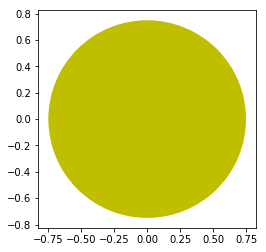

In [4]:
plt.axes()
circle = plt.Circle((0,0), radius=0.75, fc='y')
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

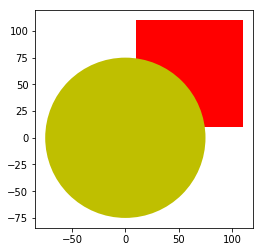

In [5]:
rectangle = plt.Rectangle((10, 10), 100, 100, fc='r')
plt.gca().add_patch(rectangle)
circle = plt.Circle((0,0), radius=75, fc='y')
plt.gca().add_patch(circle)
plt.axis('scaled')
plt.show()

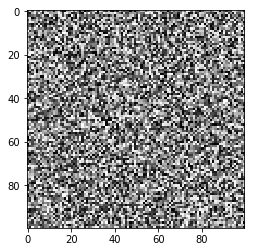

In [9]:
import numpy as np
 
X = np.random.random((100, 100)) # sample 2D array
plt.imshow(X, cmap="gray")
plt.show()

## Matrix approach

In [152]:
import numpy as np
import random
import string # only needed temporarily for debugging

In [153]:
def get_random_land_type():
    num = random.randint(1,3)
    enum = {
        1: 'H',
        2: '/',
        3: ' '
    }
    return enum[num]
#     return random.choice(string.ascii_letters)



def create_random_matrix(rows, cols):
    
    array = np.full((rows, cols), 'P')
    
    i = 0
    
    for value in np.nditer(array, op_flags=['readwrite']):
        value[...] = get_random_land_type()
        
    return array

In [154]:
mytown = create_random_matrix(10, 10)

In [155]:
def get_neighbors(array, i, j):
    mylist = []
    array_rows = len(array)
    array_cols = len(array[0])
    
    neighbor_positions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    
    for relative_position in neighbor_positions:
        try:
            if i + relative_position[0] >=0 and j + relative_position[1] >= 0:
                value = array[i + relative_position[0]][j + relative_position[1]]
                mylist.append(value)
        except:
            pass
    
    return mylist

In [156]:
print(mytown)

[['/' 'H' '/' '/' 'H' '/' 'H' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' 'H' 'H' 'H' ' ' ' ' '/']
 ['/' '/' 'H' ' ' 'H' '/' 'H' ' ' '/' '/']
 ['H' ' ' 'H' ' ' 'H' 'H' ' ' ' ' '/' '/']
 [' ' ' ' 'H' ' ' '/' 'H' '/' '/' '/' '/']
 ['/' 'H' ' ' ' ' '/' ' ' ' ' ' ' ' ' ' ']
 [' ' 'H' ' ' 'H' ' ' 'H' ' ' '/' ' ' '/']
 [' ' '/' 'H' ' ' ' ' 'H' 'H' '/' ' ' ' ']
 ['H' ' ' 'H' '/' '/' 'H' 'H' ' ' '/' 'H']
 ['H' ' ' ' ' '/' 'H' ' ' ' ' '/' ' ' ' ']]


# Scoring
Max score for any cell is 10 points
### Roads
Roads receive 3 points for being adjacent to one other road and 10 points for being adjacent to two roads
### Houses
Houses receive 3 points for existing, 6 points for being adjacent to at least one road, and 1 point for being adjacent to at least one park
### Parks
Parks receive 7 points for existing, and one additional point for each park neighbor
### City
Cities are evaluated by whether they have

In [157]:
def score_road_cell(neighbors):
    """returns score for an assumed road cell, given a list of its neighbors"""
    
    count_road_neighbors = 0
    score = 0
    
    for neighbor in neighbors:
        if neighbor == '/':
            count_road_neighbors += 1
    
    if count_road_neighbors >= 2:
        score = 10
        return score
    
    if count_road_neighbors > 0:
        score = 3
        return score
    
    score = 0
    
    return score

In [158]:
def score_house_cell(neighbors):
    """returns score for an assumed house cell, given a list of its neighbors"""
    
    score = 3
    
    has_park_neighbor = False
    has_road_neighbor = False
    
    for neighbor in neighbors:
        if neighbor == '/':
            has_road_neighbor = True
        if neighbor == ' ':
            has_park_neighbor = True
    
    if has_park_neighbor:
        score += 1
    if has_road_neighbor:
        score += 6
    
    return score
            

In [159]:
def score_park_cell(neighbors):
    """returns score for an assumed park cell, given a list of its neighbors"""
    
    score = 7
    
    for neighbor in neighbors:
        if neighbor == ' ':
            score += 1
    
    if score > 10:
        return 10
    
    return score

In [179]:
def score_cell(cell, neighbors):
    """takes cell and its neighbors and calls appropriate scoring function, returns score for single cell.
    purpose of neighbor multiplier is to discount possible max score of edge and corner cells. this is important
    since scoring for different types of cells may allow fewer neighbors to get max score. for example if a road
    receives the max score for being adjacent to two roads and parks must be adjacent to 4 other parks, all corners
    will become roads since they only have 3 neighbors"""
    
    count_neighbors = len(neighbors)
    neighbor_multiplier = float(count_neighbors)/8
    
    if cell == '/':
        print('count neighbors: ', count_neighbors, ', neighbor multiplier: ', neighbor_multiplier)
        return score_road_cell(neighbors) * neighbor_multiplier
    if cell == 'H':
        print('count neighbors: ', count_neighbors, ', neighbor multiplier: ', neighbor_multiplier)
        return score_house_cell(neighbors) * neighbor_multiplier
    if cell == ' ':
        print('count neighbors: ', count_neighbors, ', neighbor multiplier: ', neighbor_multiplier)
        return score_park_cell(neighbors) * neighbor_multiplier
    
    return 'maydayyyy'

In [183]:
score_cell('H', get_neighbors(mytown, 3, 9))

('count neighbors: ', 5, ', neighbor multiplier: ', 0.625)


5.625

In [162]:
print(mytown)

[['/' 'H' '/' '/' 'H' '/' 'H' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' 'H' 'H' 'H' ' ' ' ' '/']
 ['/' '/' 'H' ' ' 'H' '/' 'H' ' ' '/' '/']
 ['H' ' ' 'H' ' ' 'H' 'H' ' ' ' ' '/' '/']
 [' ' ' ' 'H' ' ' '/' 'H' '/' '/' '/' '/']
 ['/' 'H' ' ' ' ' '/' ' ' ' ' ' ' ' ' ' ']
 [' ' 'H' ' ' 'H' ' ' 'H' ' ' '/' ' ' '/']
 [' ' '/' 'H' ' ' ' ' 'H' 'H' '/' ' ' ' ']
 ['H' ' ' 'H' '/' '/' 'H' 'H' ' ' '/' 'H']
 ['H' ' ' ' ' '/' 'H' ' ' ' ' '/' ' ' ' ']]


In [163]:
total_score = 0
for i, row in enumerate(mytown):
    for j, cell in enumerate(row):
        around_me = get_neighbors(mytown, i, j)
        total_score += score_cell(cell, around_me)

In [164]:
total_score

840